# Selection in STEM Careers by variables

In [ ]:
## Explore and Prepare data

In [34]:
# import needed libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [35]:
# load the dataset
gwu = pd.read_excel('GWU_STEM.xlsx')
# breifly explore the data types
gwu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STEM    240 non-null    int64  
 1   GPA     240 non-null    float64
 2   SAT     240 non-null    int64  
 3   White   240 non-null    int64  
 4   Female  240 non-null    int64  
 5   Asian   240 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 11.4 KB


In [36]:
gwu.describe()

,STEM,GPA,SAT,White,Female,Asian
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,0.437500,3.517083,1299.250000,0.358333,0.491667,0.258333
std,0.497115,0.596222,173.193787,0.480513,0.500975,0.438633
min,0.000000,2.500000,1000.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,1157.500000,0.000000,0.000000,0.000000
50%,0.000000,3.600000,1320.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,1442.500000,1.000000,1.000000,1.000000
max,1.000000,4.500000,1600.000000,1.000000,1.000000,1.000000


In [37]:
# convert categorical variables' data type to object
gwu2 = gwu.astype({'White':object,'Female':object,'Asian':object})
gwu2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STEM    240 non-null    int64  
 1   GPA     240 non-null    float64
 2   SAT     240 non-null    int64  
 3   White   240 non-null    object 
 4   Female  240 non-null    object 
 5   Asian   240 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 11.4+ KB


In [38]:
gwu2.STEM.value_counts()

0    135
1    105
Name: STEM, dtype: int64

In [39]:
# remove response 'STEM' from list and the rest are predictors
X_features = list(gwu2.columns)
X_features.remove('STEM')
X_features

['GPA', 'SAT', 'White', 'Female', 'Asian']

In [40]:
# transform categorical variables to dummies
X_dummy = pd.get_dummies(gwu2[X_features], drop_first = True)
list(X_dummy.columns)

['GPA', 'SAT', 'White_1', 'Female_1', 'Asian_1']

In [41]:
# import needed libraries
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [42]:
# define the dependent variable and independent variables with a constant 
Y = gwu2.STEM
X = sm.add_constant(X_dummy)
# split the dataset into a ratio 7:3
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

# Logistic Regrssion

In [43]:
# build logistic regrssion and check model summary
model = sm.Logit(y_train, X_train)
model_logit = model.fit()
model_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.218543
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.676     
Dependent Variable: STEM             AIC:              85.4304   
Date:               2020-12-04 09:13 BIC:              104.1742  
No. Observations:   168              Log-Likelihood:   -36.715   
Df Model:           5                LL-Null:          -113.38   
Df Residuals:       162              LLR p-value:      2.6038e-31
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
------------------------------------------------------------------
            Coef.    Std.Err.     z     P>|z|    [0.025    0.975] 
------------------------------------------------------------------
const      -31.4704    5.6178  -5.6019  0.0000  -42.4810  -20.4597
GPA         -0.5487    0.5451  -1.0065  0.3142   -1.6171    0.5197
SAT          0.0250    0.0042   5.9855  0.0000    0.0168    0.0331
White_1      0.2076    0.7057   0.2942  0.7686   -1.1755    1.5908
Female_1    -1.9784    0.6553  -3.0192  0.0025   -3.2627   -0.6941
Asian_1      0.8870    0.7965   1.1137  0.2654   -0.6740    2.4481
=================================================================

"""

In [44]:
# model dignostics
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [45]:
# only keep significant variables
significant_vars = get_significant_vars(model_logit)
significant_vars

['const', 'SAT', 'Female_1']

In [46]:
# refit the logistic model and check model summary
final_logit = sm.Logit( y_train,X_train[significant_vars]).fit()
final_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.225301
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.666     
Dependent Variable: STEM             AIC:              81.7011   
Date:               2020-12-04 09:13 BIC:              91.0730   
No. Observations:   168              Log-Likelihood:   -37.851   
Df Model:           2                LL-Null:          -113.38   
Df Residuals:       165              LLR p-value:      1.5737e-33
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
            Coef.    Std.Err.     z     P>|z|    [0.025    0.975] 
------------------------------------------------------------------
const      -32.0435    5.3093  -6.0353  0.0000  -42.4496  -21.6374
SAT          0.0241    0.0039   6.1377  0.0000    0.0164    0.0318
Female_1    -1.8730    0.6315  -2.9660  0.0030   -3.1108   -0.6353
=================================================================

"""

# Predicting with Test Data

In [24]:
# create a df with the actual y_test values and the predicted probabilities by plugging the x_test values to the model
y_pred_df = pd.DataFrame( { "actual": y_test,
                           "predicted_prob": final_logit.predict(X_test[significant_vars]) } )

In [26]:
# add a 'predicted' column to the df with the predicted y values based on the criterion 0.5
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob,predicted
104,1,0.966457,1
120,1,0.052096,0
152,1,0.284821,0
24,1,0.916631,1
237,0,0.000179,0
204,0,0.027385,0
45,0,0.010080,0
18,0,0.010080,0
114,0,0.003212,0
224,1,0.980086,1


In [27]:
# import needed libraries
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

In [29]:
# create a confusion matrix
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["STEM", "NOT STEM"] ,
    yticklabels = ["STEM", "NOT STEM"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

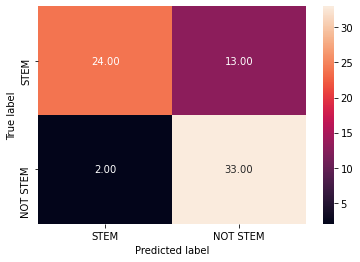

In [30]:
draw_cm( y_pred_df.actual,y_pred_df.predicted )

In [31]:
# measure accuracies
print( metrics.classification_report( y_pred_df.actual,y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.92      0.65      0.76        37

    accuracy                           0.79        72
   macro avg       0.82      0.80      0.79        72
weighted avg       0.82      0.79      0.79        72



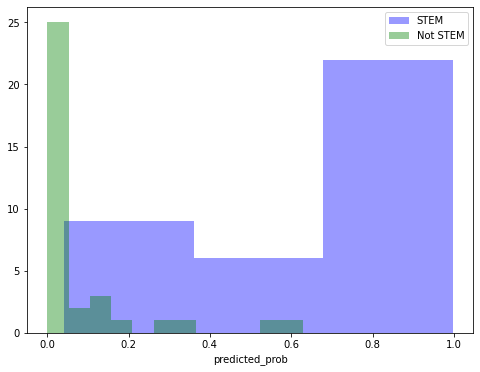

In [32]:
plt.figure( figsize = (8,6) )
sn.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"],
kde=False, color = 'b',
label = 'STEM' )
sn.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"],
kde=False, color = 'g',
label = 'Not STEM' )
plt.legend()
plt.show()

In [33]:
# ROC & AUC
def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual,probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

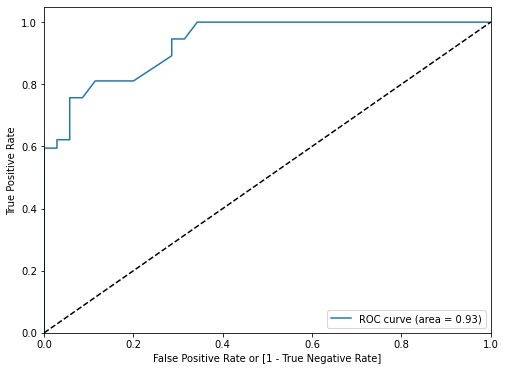

In [34]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual,y_pred_df.predicted_prob)

In [35]:
auc_score = metrics.roc_auc_score( y_pred_df.actual,y_pred_df.predicted_prob )
round( float( auc_score ), 2 )

0.93

In [36]:
# finding optimal cutoff, Youden's Index
tpr_fpr = pd.DataFrame( { 'tpr': tpr,'fpr': fpr,'thresholds': thresholds } )
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values( 'diff', ascending = False )[0:5]

,tpr,fpr,thresholds,diff
26,0.756757,0.057143,0.391983,0.699614
28,0.810811,0.114286,0.284821,0.696525
25,0.729730,0.057143,0.497244,0.672587
27,0.756757,0.085714,0.336300,0.671042
29,0.810811,0.142857,0.162029,0.667954


In [38]:
# change the criterion percentage to 0.39
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x > 0.39 else 0)

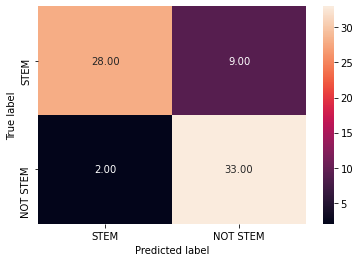

In [39]:
draw_cm( y_pred_df.actual,y_pred_df.predicted_new)

In [44]:
# measure accuracies
print(metrics.classification_report( y_pred_df.actual,y_pred_df.predicted_new ))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        35
           1       0.93      0.76      0.84        37

    accuracy                           0.85        72
   macro avg       0.86      0.85      0.85        72
weighted avg       0.86      0.85      0.85        72



With a optimal cutoff at 0.39, the false nagative errorness decreases and the false positive errorness stays the same. Thus, concluding that optimal cutoff at 0.39 is a better way for prediction.